## 01-http

- http형식의 url에 접근해서 컨텐츠를 가져오는 샘플

In [1]:
import requests 

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
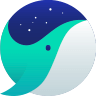
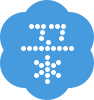

In [2]:
sample_url = 'https://www.naver.com'
r = requests.get(sample_url)

# 접속 결과로 가져올 전문
text = None

# r.status_code --> 200 = OK, 404 = Not Found(주소 오타), 50x = 대상 시스템 에러
if r.status_code != 200:
    # 에러코드와 에러메시지 출력
    print("[%d Error] %s" % (r.status_code, r.reason))
    # 프로그램 강제 종료
    quit()
else:
    # 전문 가져오기 전에 인코딩 --> 출력 결과의 한글이 깨질 경우 enc-kr로 변경
    r.encoding = 'utf-8'
    # 전문 긁어오기
    text = r.text
    
text

- 원하는 홈페이지에서 F12누르고 Networks -> Headers -> 원하는 홈페이지 주소(여기서는 네이버) -> 제일 밑에 user-agent
    - Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36
    - user-agent: 웹 브라우저의 버전값

In [3]:
# 네이버 데이터랩 실시간 검색어 크롤링
# 정상적인 경로가 아니기 때문에 전문을 긁어올 수 없다는 메시지가 뜬다. 그러므로 requests.get값을 조정해준다.
# 로그인이 필요한 페이지는 다른 방법으로 해야한다. -> Selenium
sample_url = 'https://datalab.naver.com/keyword/realtimeList.naver?where=main'

# 웹브라우저로 가장한 접속 객체 생성
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'

# 접속객체
ses = requests.Session()

# 접속 객체의 header 정보에 UserAgent를 강제로 설정.
# referer는 직전에 머물렀던 페이지 주소 -> None으로 설정해서 사용자가 직접 URL을 입력한 것으로 인식하도록 함
ses.headers.update({'User-agent' : user_agent, 'referer': None})

r = ses.get(sample_url)

# 접속 결과로 가져올 전문
text = None

# r.status_code --> 200 = OK, 404 = Not Found(주소 오타), 50x = 대상 시스템 에러
if r.status_code != 200:
    # 에러코드와 에러메시지 출력
    print("[%d Error] %s" % (r.status_code, r.reason))
    # 프로그램 강제 종료
    quit()
else:
    # 전문 가져오기 전에 인코딩 --> 출력 결과의 한글이 깨질 경우 enc-kr로 변경
    r.encoding = 'utf-8'
    # 전문 긁어오기
    text = r.text
    
text

# ==> http.ipython이라는 파일에 이 코드를 담은 함수 만들기

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=1200">\n    <title>급상승검색어 : 네이버 데이터랩</title>\n    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202101130636/css/datalab.css">\n    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202101130636/css/graph.css">\n\n    <link rel="icon" sizes="192x192" href="https://ssl.pstatic.net/static.datalab/202101130636/img/favicon/android_legacy_xxxhpdi_192x192.png" >\n    <link rel="icon" sizes="144x144" href="https://ssl.pstatic.net/static.datalab/202101130636/img/favicon/android_legacy_xxhpdi_144x144.png" >\n    <link rel="icon" sizes="96x96" href="https://ssl.pstatic.net/static.datalab/202101130636/img/favicon/android_legacy_xhdpi_96x96.png" >\n    <link rel="icon" sizes="72x72" href="https://ssl.pstatic.net/static.datalab/202101130636/img/favicon/androi